PROSES LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,merk_mobil,model_mobil,tahun_produksi,bahan_bakar,jarak_tempuh,transmisi,harga,lokasi,wilayah,kapasitas_mesin
0,bmw,x5,2007,Bensin,12.5,Automatic,149000000,Setia Budi,Jakarta Selatan,1.75
1,bmw,x1,2017,Bensin,12.5,Automatic,279000000,Serpong,Tangerang Selatan Kota,1.25
2,bmw,x3,2016,Bensin,97.5,Automatic,280000000,Seputih Mataram,Lampung Tengah Kab.,1.75
3,bmw,x1,2019,Bensin,37.5,Automatic,305000000,Cempaka Putih,Bekasi Kota,2.50
4,bmw,x1,2017,Bensin,82.5,Automatic,325000000,Sawangan,Depok Kota,2.50


MENAMPILAN JUMLAH MOBIL DISETIAP WILAYAH

C:\Users\sandy\AppData\Local\Temp\ipykernel_2100\1243527511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wilayah', data=df, palette="viridis")


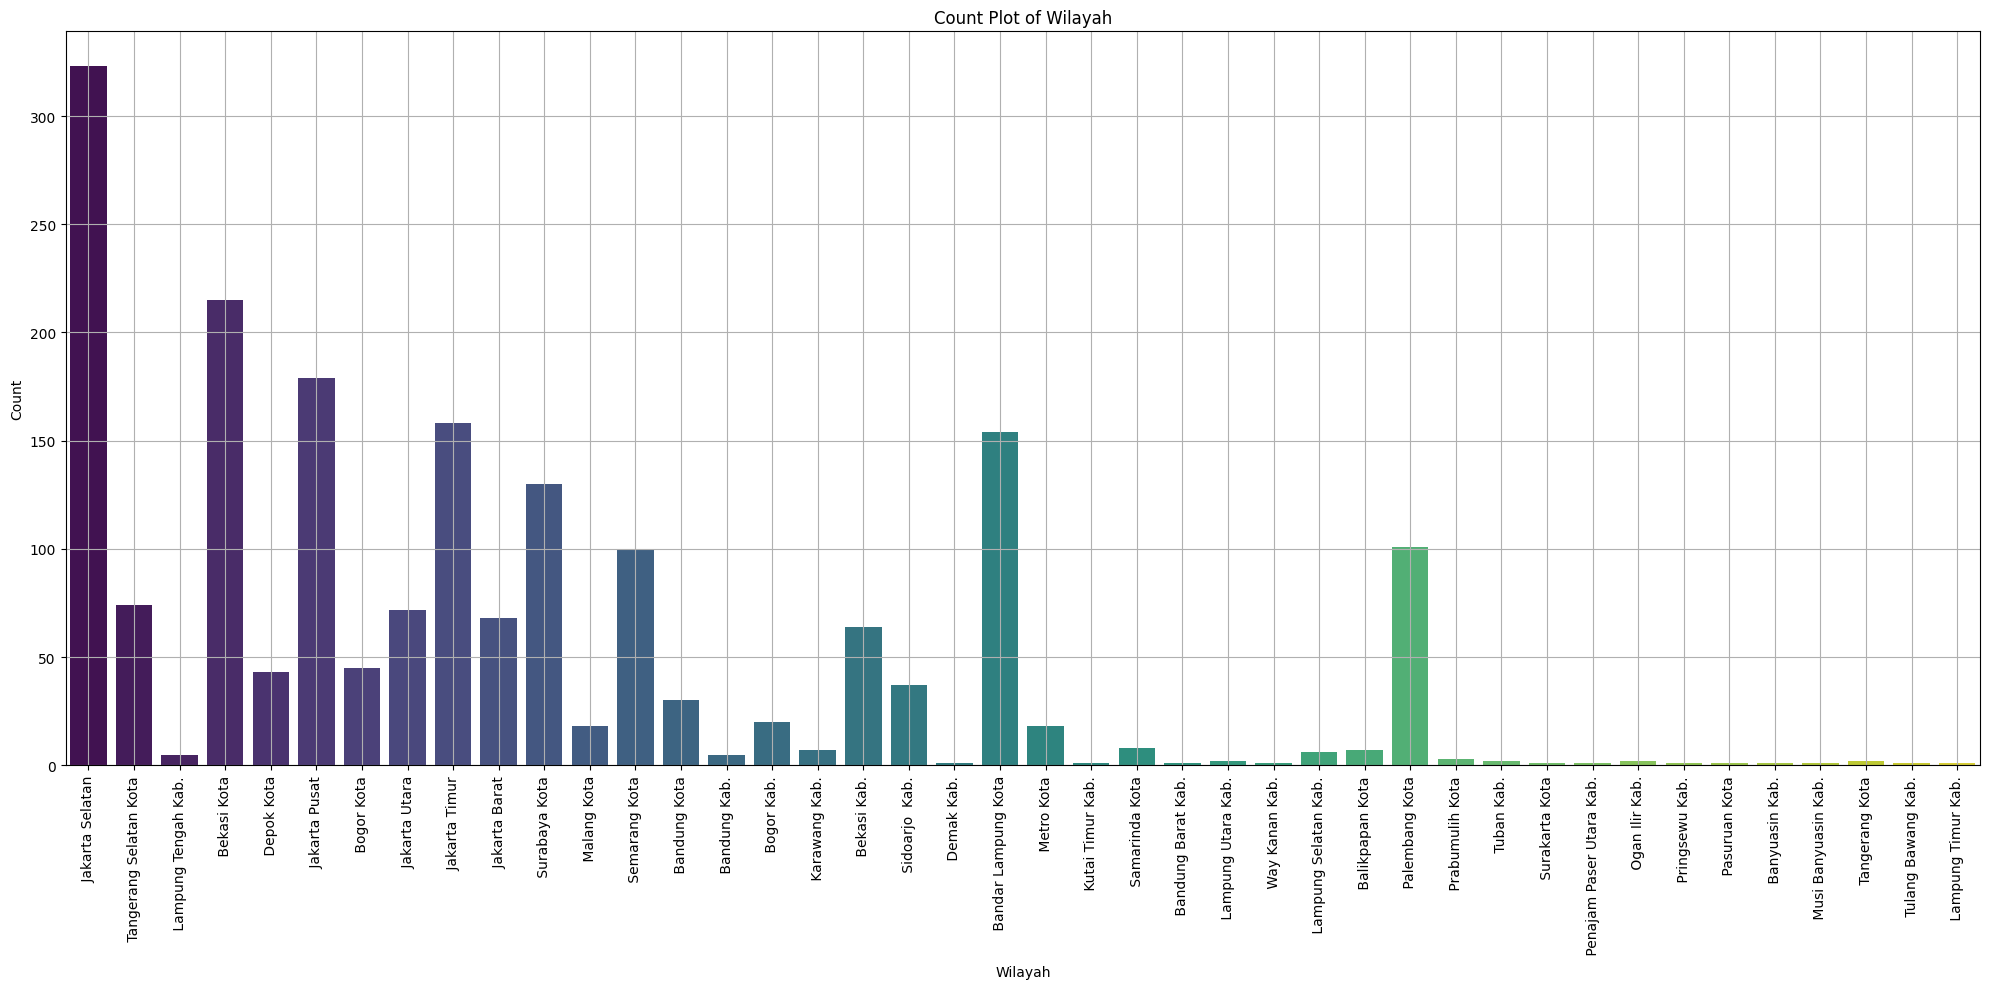

In [ ]:
# Count Plot
plt.figure(figsize=(20, 10))
sns.countplot(x='wilayah', data=df, palette="viridis")
plt.title('Count Plot of Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()  # Untuk memastikan plot tidak terpotong
plt.show()


PENANGAN OUTLIER PADA DATASET

In [ ]:
# Menghitung IQR untuk kolom jarak_tempuh, harga, dan kapasitas_mesin
Q1 = df[['jarak_tempuh', 'harga', 'kapasitas_mesin']].quantile(0.25)
Q3 = df[['jarak_tempuh', 'harga', 'kapasitas_mesin']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = (df[['jarak_tempuh', 'harga', 'kapasitas_mesin']] < lower_bound) | (df[['jarak_tempuh', 'harga', 'kapasitas_mesin']] > upper_bound)

# Menampilkan outlier
outliers_detected = df[outliers.any(axis=1)]
outliers_detected

,merk_mobil,model_mobil,tahun_produksi,bahan_bakar,jarak_tempuh,transmisi,harga,lokasi,wilayah,kapasitas_mesin
55,bmw,x3,2019,Bensin,42.5,Automatic,638000000,Duren Sawit,Jakarta Timur,1.25
56,bmw,x3,2019,Bensin,42.5,Automatic,638000000,Duren Sawit,Jakarta Timur,1.25
57,bmw,x3,2019,Bensin,42.5,Automatic,638000000,Duren Sawit,Jakarta Timur,1.75
58,bmw,x3,2019,Bensin,47.5,Automatic,638000000,Duren Sawit,Jakarta Timur,1.75
59,bmw,530i,2023,Bensin,2.5,Automatic,650000000,Cilandak,Jakarta Selatan,2.50
...,...,...,...,...,...,...,...,...,...,...
1856,toyota,alphard,2023,Bensin,2.5,Automatic,1245000000,Kebayoran Baru,Jakarta Selatan,1.75
1857,toyota,land cruiser,2017,Diesel,47.5,Automatic,1650000000,Pademangan,Jakarta Utara,1.50
1858,toyota,land cruiser,2017,Diesel,47.5,Automatic,1650000000,Kelapa Gading,Jakarta Utara,1.50
1859,toyota,land cruiser,2019,Diesel,22.5,Automatic,1975000000,Pademangan,Jakarta Utara,2.50


In [ ]:
# Menghapus outlier dari dataset
df = df[~outliers.any(axis=1)]

# Menampilkan beberapa data setelah penghapusan outlier
df.head()

,merk_mobil,model_mobil,tahun_produksi,bahan_bakar,jarak_tempuh,transmisi,harga,lokasi,wilayah,kapasitas_mesin
0,bmw,x5,2007,Bensin,12.5,Automatic,149000000,Setia Budi,Jakarta Selatan,1.75
1,bmw,x1,2017,Bensin,12.5,Automatic,279000000,Serpong,Tangerang Selatan Kota,1.25
2,bmw,x3,2016,Bensin,97.5,Automatic,280000000,Seputih Mataram,Lampung Tengah Kab.,1.75
3,bmw,x1,2019,Bensin,37.5,Automatic,305000000,Cempaka Putih,Bekasi Kota,2.50
4,bmw,x1,2017,Bensin,82.5,Automatic,325000000,Sawangan,Depok Kota,2.50


PROSES TRANSFORMASI (MENGUBAH TIPE DATA DARI OBJECT MENJADI NUMERIK)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 0 to 1908
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   merk_mobil       1735 non-null   object 
 1   model_mobil      1735 non-null   object 
 2   tahun_produksi   1735 non-null   int64  
 3   bahan_bakar      1735 non-null   object 
 4   jarak_tempuh     1735 non-null   float64
 5   transmisi        1735 non-null   object 
 6   harga            1735 non-null   int64  
 7   lokasi           1735 non-null   object 
 8   wilayah          1735 non-null   object 
 9   kapasitas_mesin  1735 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 149.1+ KB


In [ ]:
df['tahun_produksi'] = df['tahun_produksi'].astype(int)

In [ ]:
# Mengubah kolom 'transmisi' menjadi 0 dan 1
df['transmisi'] = df['transmisi'].map({'Automatic': 0, 'Manual': 1})

# Mengubah kolom 'bahan_bakar' menjadi 0 dan 1
df['bahan_bakar'] = df['bahan_bakar'].map({'Bensin': 0, 'Diesel': 1})

# Tampilkan hasil
print(df.head())


  merk_mobil model_mobil  tahun_produksi  bahan_bakar  jarak_tempuh  \
0        bmw          x5            2007          0.0          12.5   
1        bmw          x1            2017          0.0          12.5   
2        bmw          x3            2016          0.0          97.5   
3        bmw          x1            2019          0.0          37.5   
4        bmw          x1            2017          0.0          82.5   

   transmisi      harga           lokasi                  wilayah  \
0        0.0  149000000       Setia Budi          Jakarta Selatan   
1        0.0  279000000          Serpong   Tangerang Selatan Kota   
2        0.0  280000000  Seputih Mataram      Lampung Tengah Kab.   
3        0.0  305000000    Cempaka Putih              Bekasi Kota   
4        0.0  325000000         Sawangan               Depok Kota   

   kapasitas_mesin  
0             1.75  
1             1.25  
2             1.75  
3             2.50  
4             2.50  


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inisialisasi encoder
label_encoder_model = LabelEncoder()
label_encoder_wilayah = LabelEncoder()
label_encoder_merk = LabelEncoder()


df['model_mobil'] = label_encoder_model.fit_transform(df['model_mobil'])
df['wilayah'] = label_encoder_wilayah.fit_transform(df['wilayah'])
df['merk_mobil'] = label_encoder_merk.fit_transform(df['merk_mobil'])

# Menampilkan beberapa baris pertama untuk memeriksa hasil transformasi
df.head()


,merk_mobil,model_mobil,tahun_produksi,bahan_bakar,jarak_tempuh,transmisi,harga,lokasi,wilayah,kapasitas_mesin
0,0,153,2007,0.0,12.5,0.0,149000000,Setia Budi,14,1.75
1,0,151,2017,0.0,12.5,0.0,279000000,Serpong,38,1.25
2,0,152,2016,0.0,97.5,0.0,280000000,Seputih Mataram,20,1.75
3,0,151,2019,0.0,37.5,0.0,305000000,Cempaka Putih,7,2.50
4,0,151,2017,0.0,82.5,0.0,325000000,Sawangan,11,2.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1735 entries, 0 to 1908
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   merk_mobil       1735 non-null   int32  
 1   model_mobil      1735 non-null   int32  
 2   tahun_produksi   1735 non-null   int32  
 3   bahan_bakar      1727 non-null   float64
 4   jarak_tempuh     1735 non-null   float64
 5   transmisi        1730 non-null   float64
 6   harga            1735 non-null   int64  
 7   lokasi           1735 non-null   object 
 8   wilayah          1735 non-null   int32  
 9   kapasitas_mesin  1735 non-null   float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 122.0+ KB


MENGHAPUS KOLOM LOKASI (tidak digunakan)

In [ ]:
df = df.drop( columns=['lokasi'])

VISUALISASI DATA

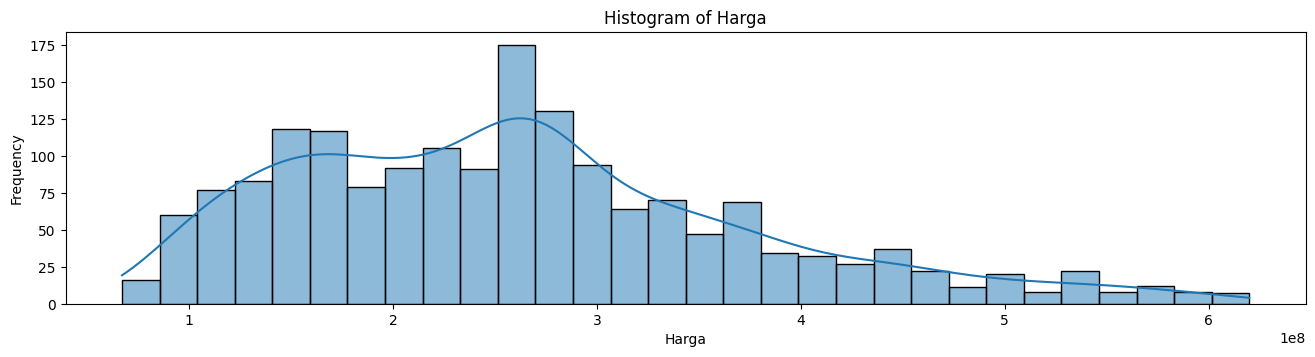

In [ ]:
# Mengatur ukuran tampilan plot
plt.figure(figsize=(16, 12))

# 1. Histogram untuk variabel numerik
plt.subplot(3, 1, 1)
sns.histplot(df['harga'], bins=30, kde=True)
plt.title('Histogram of Harga')
plt.xlabel('Harga')
plt.ylabel('Frequency')
plt.show()

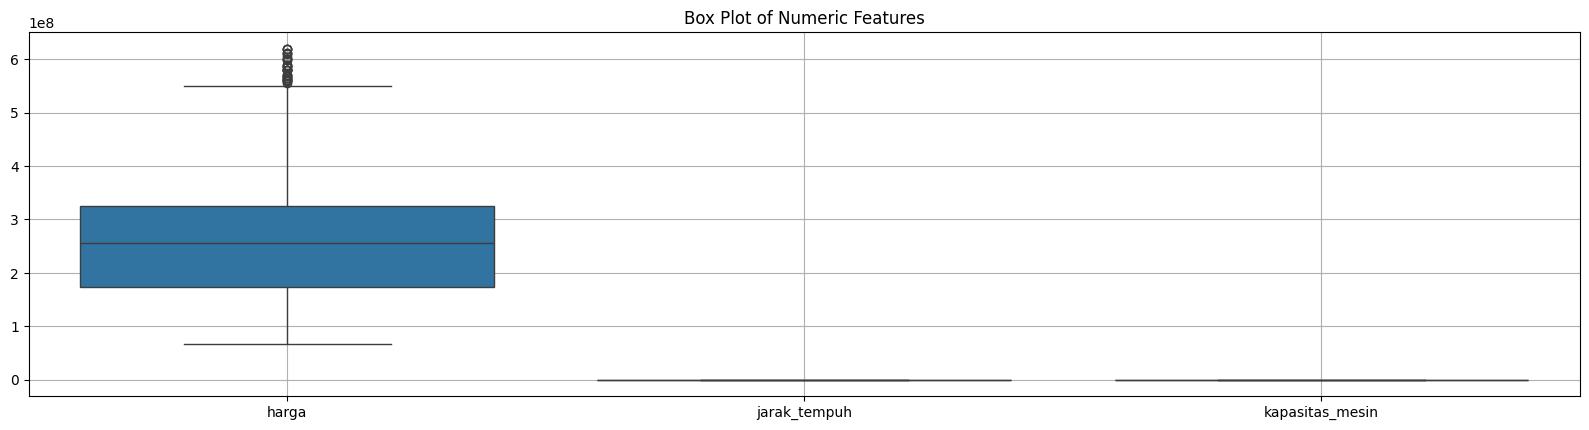

In [ ]:
# 2. Box Plot untuk variabel numerik
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 2)
sns.boxplot(data=df[['harga', 'jarak_tempuh', 'kapasitas_mesin']])
plt.title('Box Plot of Numeric Features')
plt.grid(True)
plt.tight_layout() 
plt.show()



STATISTIK DESKRIFTIF DARI DATASET

In [ ]:
df.describe()

,merk_mobil,model_mobil,tahun_produksi,bahan_bakar,jarak_tempuh,transmisi,harga,wilayah,kapasitas_mesin
count,1735.000000,1735.000000,1735.000000,1727.000000,1735.000000,1730.000000,1.735000e+03,1735.000000,1735.000000
mean,12.216715,80.417867,2019.063977,0.136074,52.743804,0.196532,2.620971e+08,16.642075,1.547262
std,7.348568,48.960616,3.001720,0.342967,34.870777,0.397490,1.132597e+08,11.147918,0.446213
min,0.000000,0.000000,1990.000000,0.000000,2.500000,0.000000,6.700000e+07,0.000000,0.500000
25%,6.000000,32.000000,2018.000000,0.000000,22.500000,0.000000,1.730000e+08,7.000000,1.250000
50%,13.000000,84.000000,2019.000000,0.000000,47.500000,0.000000,2.550000e+08,14.000000,1.250000
75%,20.000000,120.000000,2021.000000,0.000000,77.500000,0.000000,3.255000e+08,27.000000,1.750000
max,22.000000,159.000000,2024.000000,1.000000,157.500000,1.000000,6.200000e+08,41.000000,2.500000


PELATIHAN MODEL RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Memastikan kolom tahun_produksi ada
if 'tahun_produksi' not in df.columns:
    raise ValueError("Kolom 'tahun_produksi' tidak ditemukan dalam dataset")

# Menyiapkan fitur dan target
X = df[['model_mobil', 'wilayah', 'merk_mobil', 'transmisi', 'bahan_bakar', 'jarak_tempuh', 'kapasitas_mesin', 'tahun_produksi']]
y = df['harga']

# Mengisi nilai NaN dengan nilai rata-rata atau nilai default lainnya
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline dengan StandardScaler dan RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Parameter grid untuk GridSearchCV
param_grid = {
    'rf__n_estimators': [200, 300, 400],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

# Inisialisasi GridSearchCV dengan pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=6, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error', error_score='raise')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Mendapatkan hasil terbaik
best_pipeline = grid_search.best_estimator_

y_pred = best_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# r2, mse, mae
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Mean Absolute Error (Best): {mae}')
print(f'Mean Squared Error (Best): {mse}')
print(f'R^2 Score (Best): {r2}')

C:\Users\sandy\AppData\Local\Temp\ipykernel_2100\2654806054.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Fitting 6 folds for each of 324 candidates, totalling 1944 fits
Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
Best score: -1289058001785972.2
Best parameters: {'rf__max_depth': 20, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
Best score: -1289058001785972.2
Mean Absolute Error (Best): 20791941.516528208
Mean Squared Error (Best): 1357485388376315.5
R^2 Score (Best): 0.9008991787366345


PEMBUATAN MODEL UNTUK WEBAPP

In [ ]:
import joblib

In [ ]:
# Menyimpan encoder
joblib.dump(label_encoder_model, 'label_encoder_model.pkl')
joblib.dump(label_encoder_wilayah, 'label_encoder_wilayah.pkl')
joblib.dump(label_encoder_merk, 'label_encoder_merk.pkl')


['label_encoder_merk.pkl']

In [ ]:
# Menyimpan model terbaik
joblib.dump(best_pipeline, 'best_model.pkl')

['best_model.pkl']

In [ ]:
import pandas as pd

# Muat dataset
df = pd.read_csv('dataset.csv')

# Ambil nilai unik dari kolom yang diperlukan
unique_models = df['model_mobil'].unique()
unique_wilayah = df['wilayah'].unique()
unique_merk = df['merk_mobil'].unique()

# Simpan nilai unik ke dalam file
import joblib
joblib.dump({
    'unique_models': unique_models,
    'unique_wilayah': unique_wilayah,
    'unique_merk': unique_merk
}, 'unique_values.pkl')


['unique_values.pkl']